<a href="https://colab.research.google.com/github/ViniciusKanh/ObesityDataMining_UNESP/blob/main/AnaliseObesidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-Processamento

In [ ]:
from google.colab import files
import pandas as pd

# Fazer upload do arquivo
uploaded = files.upload()

# Carregar o dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Exibir as primeiras linhas do dataset
data.head()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Análise Inicial dos Dados

In [ ]:
# Verificar informações gerais sobre o dataset
data.info()

# Resumo estatístico das variáveis numéricas
data.describe()

# Verificar a existência de valores ausentes
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


## Tratamento de Valores Ausentes

In [ ]:
# Remover linhas com valores ausentes
data_cleaned = data.dropna()

data['Height'].fillna(data['Height'].mean(), inplace=True)
data['FAVC'].fillna(data['FAVC'].mode()[0], inplace=True)


<ipython-input-3-e6b49e89a074>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Height'].fillna(data['Height'].mean(), inplace=True)
<ipython-input-3-e6b49e89a074>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## Conversão de Variáveis Categóricas

In [ ]:
# Converter variáveis categóricas em variáveis numéricas usando OneHotEncoder ou LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Exemplo com LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = label_encoder.fit_transform(data['FAVC'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])

# Verificar as colunas categóricas restantes
data.select_dtypes(include=['object']).head()


,CAEC,SCC,CALC,MTRANS,NObeyesdad
0,Sometimes,no,no,Public_Transportation,Normal_Weight
1,Sometimes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Sometimes,no,Frequently,Public_Transportation,Normal_Weight
3,Sometimes,no,Frequently,Walking,Overweight_Level_I
4,Sometimes,no,Sometimes,Public_Transportation,Overweight_Level_II


## Análise de Outliers

Outliers são valores que estão muito distantes da maioria dos dados e podem distorcer os resultados de alguns algoritmos de ML. Antes da normalização, é uma boa prática visualizá-los e decidir se devem ser removidos ou tratados.

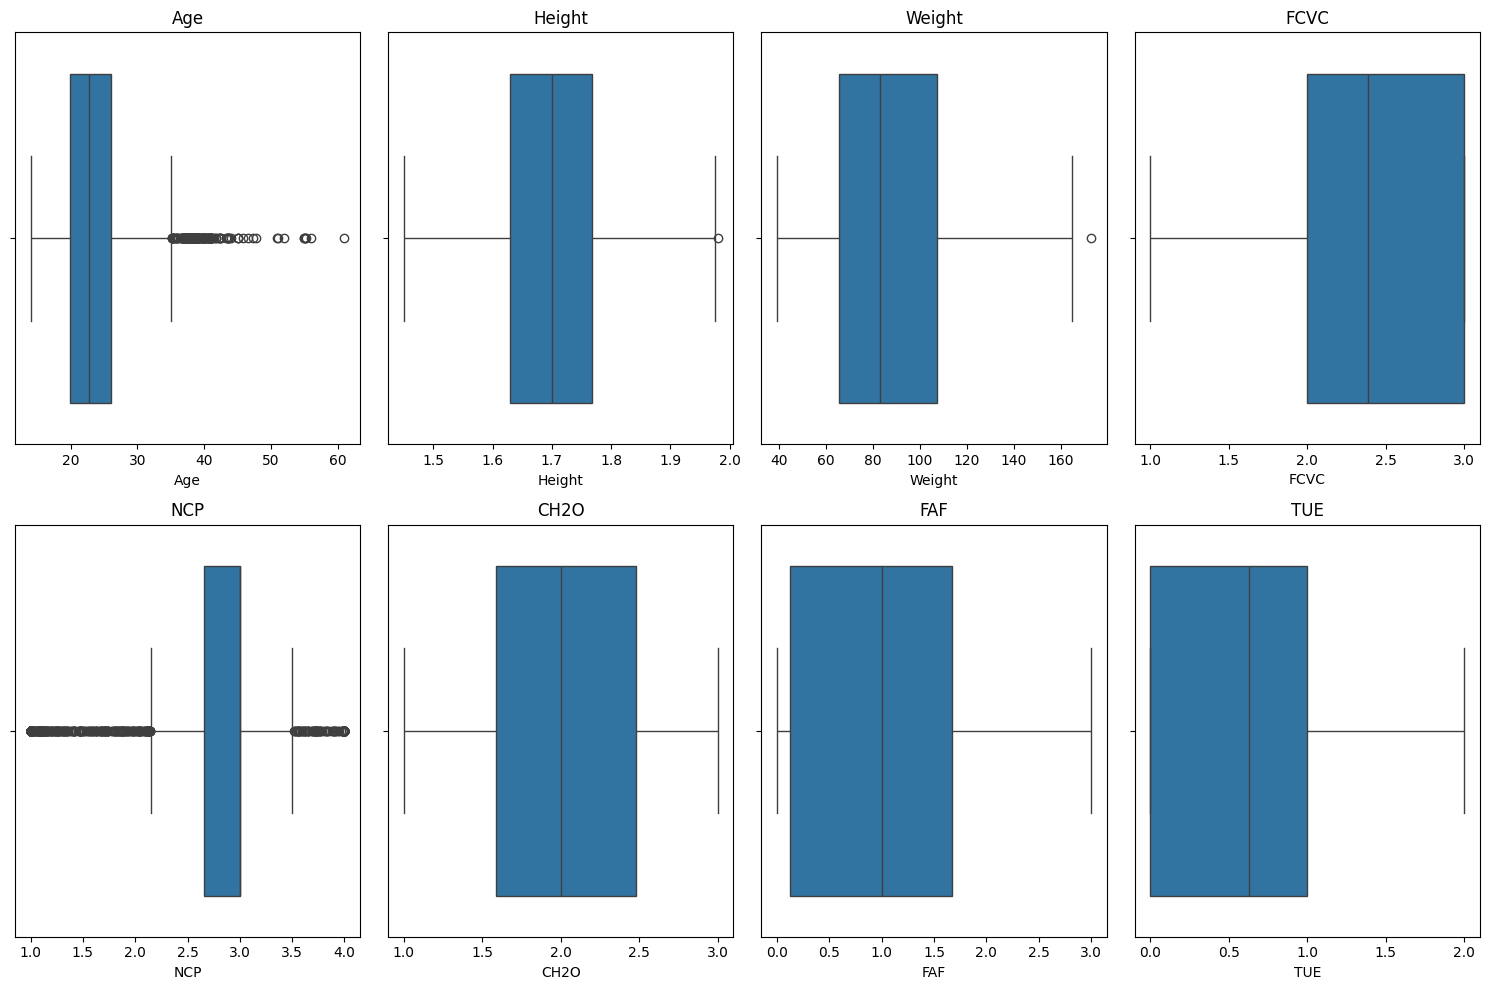

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um boxplot para cada variável numérica
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# Análise e Interpretação dos Outliers 📊




A partir dos gráficos de **boxplot** gerados, podemos identificar algumas informações importantes sobre os outliers presentes nas variáveis numéricas do dataset. Vamos analisar cada uma delas em detalhes:

## 1. Age (Idade)
📌 **Observações**:  
- Há um grande número de outliers na faixa de idade superior a 40 anos.  
- Isso pode indicar que a maioria das pessoas no dataset tem menos de 40 anos, o que torna idades mais avançadas incomuns no conjunto de dados.  

🎯 **Interpretação**:  
- O grupo de pessoas acima de 40 anos representa uma minoria, o que pode ser importante ao considerar segmentações por idade. Dependendo do modelo de Machine Learning, pode ser necessário tratar esses outliers.

## 2. Height (Altura)
📌 **Observações**:  
- A maioria dos dados de altura está concentrada entre 1,5m e 1,8m, com poucos outliers acima de 1,9m.  
- Esses outliers representam pessoas excepcionalmente altas.  

🎯 **Interpretação**:  
- Pessoas muito altas são raras no dataset, mas os outliers não parecem extremos. Dependendo do seu objetivo, pode ser interessante mantê-los.

## 3. Weight (Peso)
📌 **Observações**:  
- O peso varia de forma concentrada, com a maioria das observações entre 40kg e 120kg.  
- Existem alguns outliers para pesos mais altos (acima de 150kg).  

🎯 **Interpretação**:  
- Pessoas com peso significativamente alto são raras e podem estar associadas a casos extremos de obesidade. Se o foco do projeto for analisar padrões de obesidade, esses outliers podem ser importantes.

## 4. FCVC (Consumo de Vegetais)
📌 **Observações**:  
- Não há outliers significativos para o consumo de vegetais, o que indica que a maioria das pessoas segue padrões semelhantes nessa variável.  

🎯 **Interpretação**:  
- O consumo de vegetais parece estar distribuído de forma equilibrada no dataset, sem a necessidade de grandes intervenções.

## 5. NCP (Número de Refeições por Dia)
📌 **Observações**:  
- Há um número considerável de outliers para valores baixos (entre 1 e 2 refeições por dia).  
- A maioria das pessoas faz entre 2 e 3 refeições diárias.  

🎯 **Interpretação**:  
- As pessoas que consomem menos refeições diárias são uma minoria e podem representar hábitos alimentares não convencionais. Se o foco for analisar o impacto da alimentação na obesidade, esses outliers podem ser relevantes.

## 6. CH2O (Consumo de Água)
📌 **Observações**:  
- A distribuição de consumo de água é bastante equilibrada, sem outliers visíveis.  

🎯 **Interpretação**:  
- A variável de consumo de água parece bem comportada, indicando que não há casos extremos.

## 7. FAF (Atividade Física)
📌 **Observações**:  
- Não há outliers significativos na variável de frequência de atividade física.  

🎯 **Interpretação**:  
- A frequência de atividade física é relativamente estável entre os participantes, sem necessidade de tratamento de outliers aqui.

## 8. TUE (Uso de Tecnologia)
📌 **Observações**:  
- Sem outliers visíveis, o uso de tecnologia parece estar distribuído de forma equilibrada.  

🎯 **Interpretação**:  
- Não há casos extremos para o tempo de uso de tecnologia, o que indica uma variação regular.

---

# Conclusão Geral 📈

- As variáveis **Age**, **Weight** e **NCP** apresentam outliers que podem ser significativos dependendo do objetivo do projeto. Se esses outliers não forem tratados, eles podem impactar a performance dos modelos de Machine Learning.  
- Variáveis como **Height** e **FCVC** possuem alguns outliers, mas nada que seja alarmante.  
- Para variáveis como **CH2O**, **FAF** e **TUE**, a distribuição parece estável, e não há a necessidade de remover outliers.  

Essa análise detalhada dos outliers permite que você tome decisões informadas sobre como tratar os dados para que o modelo final tenha um bom desempenho e reflita corretamente as tendências do dataset! 🎯

## Tratamento dos Outliers

In [ ]:
# Função para remover outliers com base no IQR (Intervalo Interquartil)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Aplicar a função para as variáveis com outliers
columns_with_outliers = ['Age', 'Weight', 'NCP']
for column in columns_with_outliers:
    data = remove_outliers(data, column)

# Verificar a nova dimensão do dataset após a remoção dos outliers
data.shape


(1399, 17)

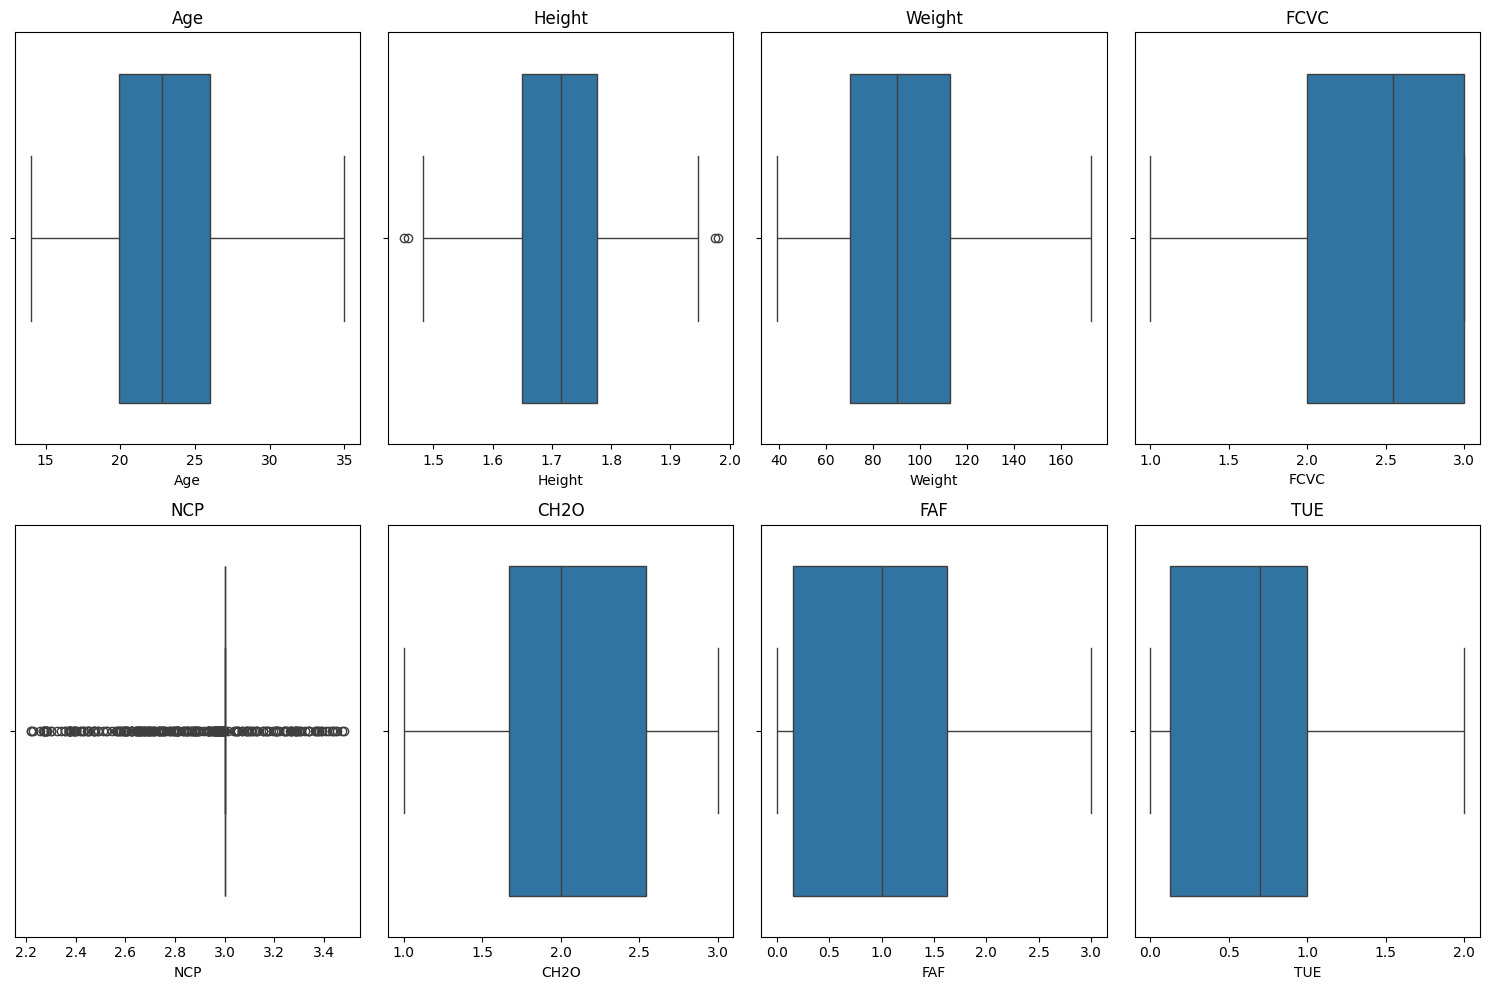

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um boxplot para cada variável numérica
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Análise Pós-Tratamento dos Outliers 📊





Após o tratamento dos outliers, o gráfico mostra que as alterações foram aplicadas com sucesso em várias variáveis. Vamos revisar o que mudou e o que ainda precisa ser analisado:

## 1. Age (Idade)
- ✅ **Observação**: Agora, a variável está sem outliers. A faixa de idade está concentrada entre 15 e 35 anos.
- **Ação**: Nenhuma ação necessária, o tratamento foi eficaz.

## 2. Height (Altura)
- ⚠️ **Observação**: Há um pequeno outlier para pessoas com altura próxima de 2 metros.
- **Ação**: Esse outlier pode ser mantido, pois não é extremo, e pode ser relevante dependendo do objetivo da análise.

## 3. Weight (Peso)
- ✅ **Observação**: O outlier identificado anteriormente foi removido. A distribuição de peso agora está concentrada entre 40kg e 160kg.
- **Ação**: Nenhuma ação necessária, o tratamento foi eficaz.

## 4. FCVC (Consumo de Vegetais)
- ✅ **Observação**: Não há outliers para essa variável, o que está correto.
- **Ação**: Nenhuma ação necessária.

## 5. NCP (Número de Refeições por Dia)
- ⚠️ **Observação**: Ainda existem muitos outliers no intervalo de 2 a 3 refeições por dia.
- **Ação**: Esses outliers podem refletir hábitos alimentares relevantes no estudo da obesidade. Talvez seja interessante mantê-los, dependendo do foco do projeto.

## 6. CH2O (Consumo de Água)
- ✅ **Observação**: Não há outliers, e a distribuição está equilibrada.
- **Ação**: Nenhuma ação necessária.

## 7. FAF (Atividade Física)
- ✅ **Observação**: Não há outliers e a variável apresenta uma distribuição equilibrada.
- **Ação**: Nenhuma ação necessária.

## 8. TUE (Uso de Tecnologia)
- ✅ **Observação**: A variável continua sem outliers, com uma variação regular de uso de tecnologia.
- **Ação**: Nenhuma ação necessária.

---

# Conclusão Geral 📈

- O tratamento de outliers foi bem-sucedido nas variáveis mais críticas, como **Age** e **Weight**.  
- Para a variável **NCP**, embora existam muitos outliers, esses dados podem ser úteis, já que refletem a realidade de hábitos alimentares irregulares, comuns em estudos de obesidade.  
- As variáveis **Height** e **CH2O** estão praticamente sem outliers significativos, e os poucos existentes podem ser mantidos se forem relevantes para o estudo.

## Verificação de Valores Duplicados 🔍

In [ ]:
# Verificar e remover valores duplicados
data = data.drop_duplicates()


## Escalonamento das Variáveis Numéricas 📏

O escalonamento das variáveis numéricas é um passo importante, especialmente se usar algoritmos que são sensíveis à magnitude das variáveis, como SVM, K-NN, Redes Neurais, entre outros.

Foi feito a normalização (ou padronização) das variáveis numéricas:

a. Normalização (Min-Max Scaler)
normalizar os dados para um intervalo entre 0 e 1:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir as colunas numéricas
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Verificar os dados normalizados
data.head()


<ipython-input-27-5d8ff822ee3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = scaler.fit_transform(data[num_cols])


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.333333,0.320755,0.186567,1,0,0.5,0.618068,Sometimes,0,0.5,no,0.000000,0.5,no,Public_Transportation,Normal_Weight
1,0,0.333333,0.132075,0.126866,1,0,1.0,0.618068,Sometimes,1,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,0.428571,0.660377,0.283582,1,0,0.5,0.618068,Sometimes,0,0.5,no,0.666667,0.5,Frequently,Public_Transportation,Normal_Weight
3,1,0.619048,0.660377,0.358209,0,0,1.0,0.618068,Sometimes,0,0.5,no,0.666667,0.0,Frequently,Walking,Overweight_Level_I
5,1,0.714286,0.320755,0.104478,0,1,0.5,0.618068,Sometimes,0,0.5,no,0.000000,0.0,Sometimes,Automobile,Normal_Weight


##  Verificação Final dos Dados 🔍

In [ ]:
# Verificar se todas as variáveis estão no formato correto e se há alguma anomalia
data.info()

# Verificar um resumo estatístico para as variáveis numéricas
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1395 non-null   int64  
 1   Age                             1395 non-null   float64
 2   Height                          1395 non-null   float64
 3   Weight                          1395 non-null   float64
 4   family_history_with_overweight  1395 non-null   int64  
 5   FAVC                            1395 non-null   int64  
 6   FCVC                            1395 non-null   float64
 7   NCP                             1395 non-null   float64
 8   CAEC                            1395 non-null   object 
 9   SMOKE                           1395 non-null   int64  
 10  CH2O                            1395 non-null   float64
 11  SCC                             1395 non-null   object 
 12  FAF                             1395 no

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,FAF,TUE
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,0.518280,0.436467,0.499791,0.395807,0.849462,0.886738,0.726966,0.592653,0.020789,0.524451,0.343260,0.350146
std,0.499845,0.198549,0.165441,0.204928,0.357726,0.317026,0.275084,0.121030,0.142727,0.302860,0.282338,0.291921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.282807,0.377358,0.231343,1.000000,1.000000,0.500000,0.618068,0.000000,0.337448,0.051382,0.063170
50%,1.000000,0.417696,0.501547,0.385611,1.000000,1.000000,0.777700,0.618068,0.000000,0.500000,0.333333,0.346304
75%,1.000000,0.570677,0.614349,0.551324,1.000000,1.000000,1.000000,0.618068,0.000000,0.773365,0.541119,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Conversão de Variáveis Categóricas Restantes 🔄

In [ ]:
# Converter variáveis categóricas restantes em variáveis numéricas
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['SCC'] = label_encoder.fit_transform(data['SCC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Verificar a nova estrutura do dataset
data.dtypes


,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,int64
FAVC,int64
FCVC,float64
NCP,float64
CAEC,int64
SMOKE,int64


In [ ]:
# Estatísticas descritivas das variáveis numéricas
data.describe()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000,1395.000000
mean,0.518280,0.436467,0.499791,0.395807,0.849462,0.886738,0.726966,0.592653,1.869534,0.020789,0.524451,0.048029,0.343260,0.350146,1.205018,2.570609,3.084588
std,0.499845,0.198549,0.165441,0.204928,0.357726,0.317026,0.275084,0.121030,0.427074,0.142727,0.302860,0.213904,0.282338,0.291921,0.475637,1.092493,1.838146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.282807,0.377358,0.231343,1.000000,1.000000,0.500000,0.618068,2.000000,0.000000,0.337448,0.000000,0.051382,0.063170,1.000000,3.000000,2.000000
50%,1.000000,0.417696,0.501547,0.385611,1.000000,1.000000,0.777700,0.618068,2.000000,0.000000,0.500000,0.000000,0.333333,0.346304,1.000000,3.000000,3.000000
75%,1.000000,0.570677,0.614349,0.551324,1.000000,1.000000,1.000000,0.618068,2.000000,0.000000,0.773365,0.000000,0.541119,0.500000,1.000000,3.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000


# Análise dos Dados Escalonados 📊



## Gender:
- **Mean (Média)**: 0.518 - A proporção entre homens e mulheres está equilibrada (0 representa "Female" e 1 representa "Male").
- **Distribuição**: Como essa variável foi binarizada (0 ou 1), não há necessidade de escalonamento adicional.

## Age:
- **Mean**: 0.436 - A idade está normalizada entre 0 e 1, o que mostra uma boa distribuição no dataset.
- **Std (Desvio Padrão)**: 0.198 - Mostra uma variação moderada entre os indivíduos.
- **Distribuição**: Como a idade foi normalizada, tudo está correto para a modelagem.

## Height e Weight:
- **Mean para altura**: 0.499 - Altura foi escalonada corretamente entre 0 e 1.
- **Mean para peso**: 0.395 - Peso também foi escalonado corretamente.
- **Distribuição**: Essas variáveis foram escalonadas de forma adequada com o Min-Max Scaler.

## family_history_with_overweight e FAVC:
- **Mean**: 0.849 e 0.886 - A maioria dos indivíduos tem histórico familiar de sobrepeso e consome frequentemente alimentos hipercalóricos.
- **Distribuição**: Variáveis categóricas com valores de 0 e 1, que estão corretamente codificadas.

## FCVC (Consumo de Vegetais), NCP (Número de Refeições), CH2O (Consumo de Água), FAF (Atividade Física), TUE (Uso de Tecnologia):
- Todas as variáveis foram normalizadas, com médias variando entre 0.343 a 0.726, o que indica uma distribuição adequada para estas variáveis numéricas.
- **Distribuição**: Não há necessidade de ajustes adicionais aqui.

## CAEC (Consumo de Alimentos entre as Refeições), CALC (Consumo de Álcool), MTRANS (Meio de Transporte):
- **CAEC (Mean 1.869)** e **CALC (Mean 1.205)** têm valores medianos normais, já que são variáveis categóricas codificadas.
- **MTRANS** também foi adequadamente codificada para modelagem.

## NObeyesdad (Estado de Obesidade):
- A variável alvo foi corretamente convertida, com valores codificados que variam de 0 a 6, representando as diferentes classes de obesidade.


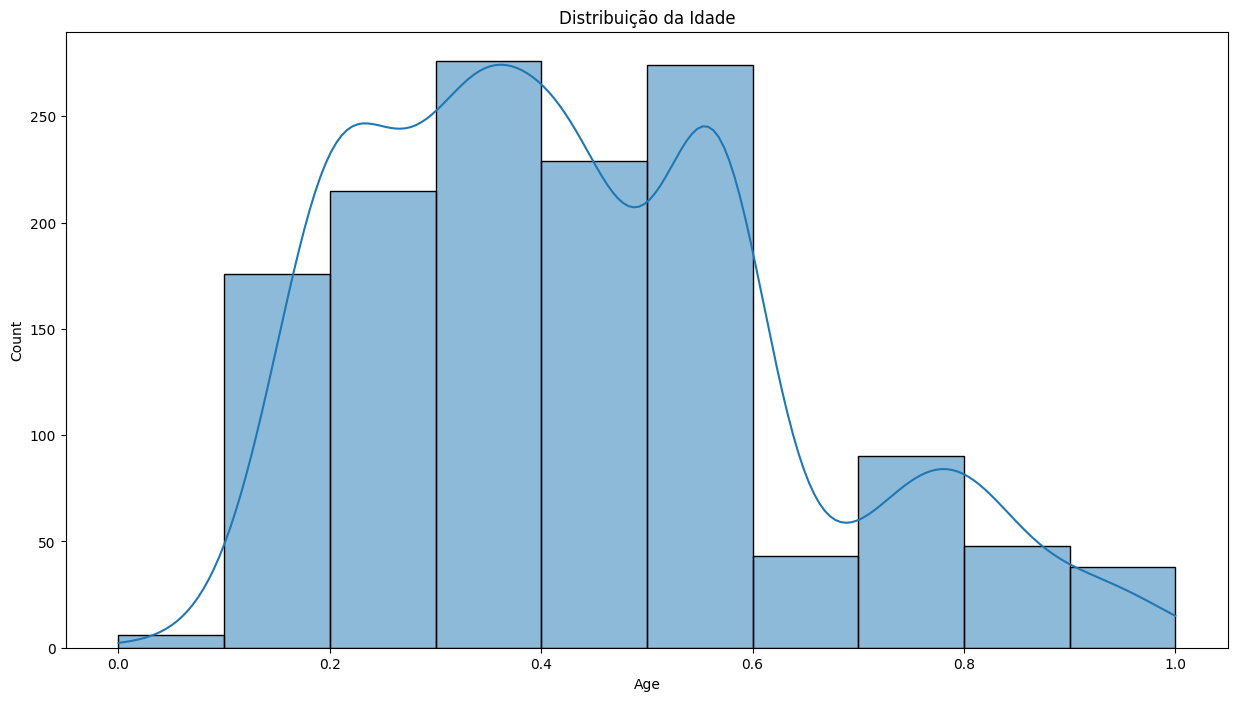

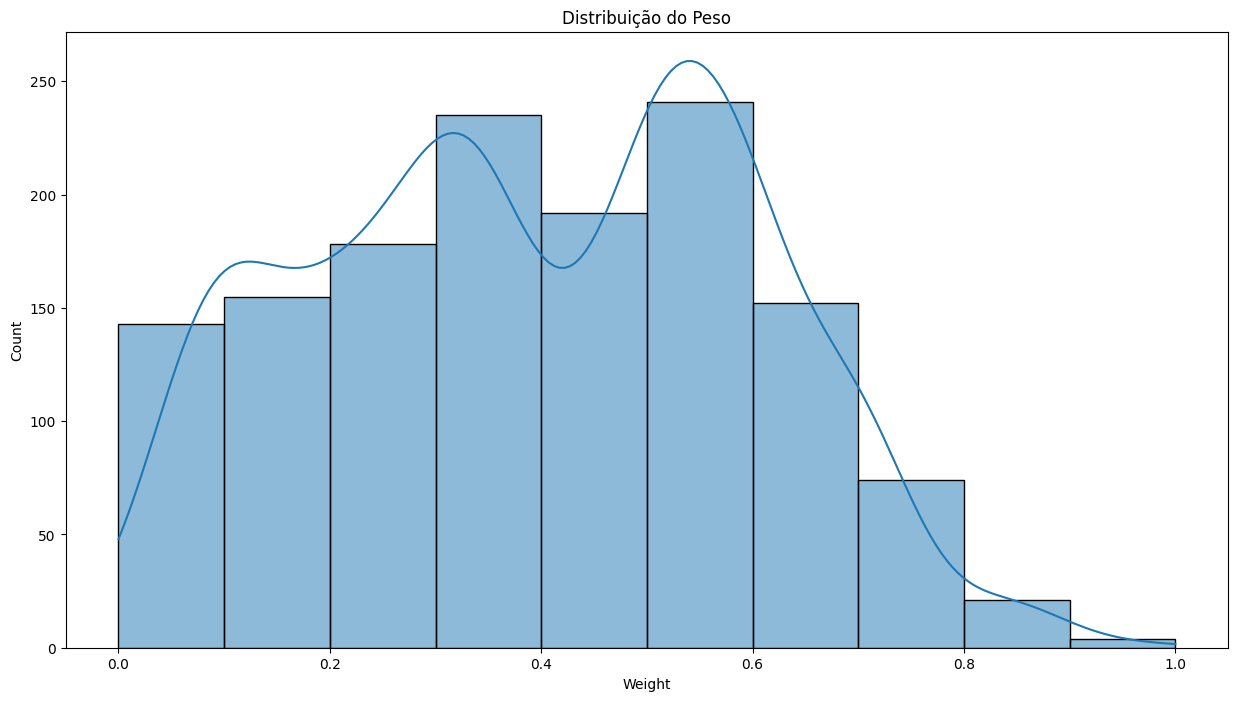

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar as distribuições das variáveis principais
plt.figure(figsize=(15, 8))
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Distribuição da Idade')
plt.show()

plt.figure(figsize=(15, 8))
sns.histplot(data['Weight'], kde=True, bins=10)
plt.title('Distribuição do Peso')
plt.show()


## Verificando Balanceamento

Saving dataset_tratado.csv to dataset_tratado (2).csv


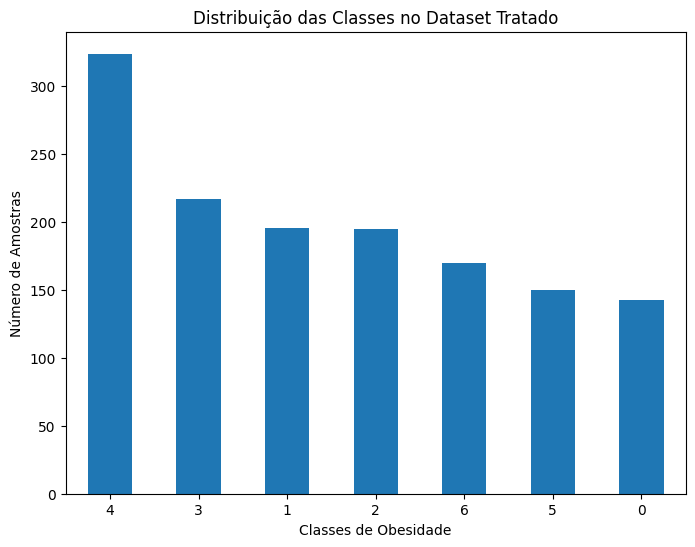

NObeyesdad
4    324
3    217
1    196
2    195
6    170
5    150
0    143
Name: count, dtype: int64


In [ ]:
# Importar bibliotecas necessárias
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Contar a distribuição das classes
class_counts = data['NObeyesdad'].value_counts()

# Plotar a distribuição das classes
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar')
plt.title('Distribuição das Classes no Dataset Tratado')
plt.xlabel('Classes de Obesidade')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.show()

# Exibir as contagens
print(class_counts)


In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição de classes
from collections import Counter
print(f"Distribuição de classes após SMOTE: {Counter(y_resampled)}")


Distribuição de classes após SMOTE: Counter({1: 324, 5: 324, 2: 324, 6: 324, 3: 324, 0: 324, 4: 324})


In [ ]:
# Instalar imblearn no Colab
!pip install imblearn

# Importar bibliotecas necessárias
from imblearn.over_sampling import SMOTE
import pandas as pd
from google.colab import files

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Separar as variáveis preditivas (X) e a variável-alvo (y)
X = data.drop(columns=['NObeyesdad'])  # Variáveis preditivas
y = data['NObeyesdad']                 # Variável-alvo

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame balanceado com as variáveis preditivas e alvo
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['NObeyesdad'] = y_resampled

# Salvar o dataset balanceado como CSV
data_resampled.to_csv('dataset_balanceado.csv', index=False)

# Fazer o download do arquivo CSV no Colab
files.download('dataset_balanceado.csv')


Saving dataset_tratado.csv to dataset_tratado (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Divisão entre Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = data.drop(columns=['NObeyesdad'])  # 'NObeyesdad' é a variável alvo
y = data['NObeyesdad']

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos datasets
print(f"Tamanho do treino: {X_train.shape}")
print(f"Tamanho do teste: {X_test.shape}")


Tamanho do treino: (976, 16)
Tamanho do teste: (419, 16)


In [ ]:
# Salvar o dataset tratado como CSV
data.to_csv('dataset_tratado.csv', index=False)

# Se estiver no Google Colab, você pode baixar diretamente:
from google.colab import files
files.download('dataset_tratado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Salvar o dataset tratado como pickle
data.to_pickle('dataset_tratado.pkl')

# Se estiver no Google Colab, você pode baixar diretamente:
from google.colab import files
files.download('dataset_tratado.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PCA

In [ ]:
# Verificar a variância explicada pelos componentes principais
print(pca.explained_variance_ratio_)


[0.47979261 0.10341276 0.09937941 0.06872658]


In [ ]:
# Ajustar o PCA para capturar mais variância
pca = PCA(n_components=0.95)  # Capturar 95% da variância
X_train_pca = pca.fit_transform(X_train)


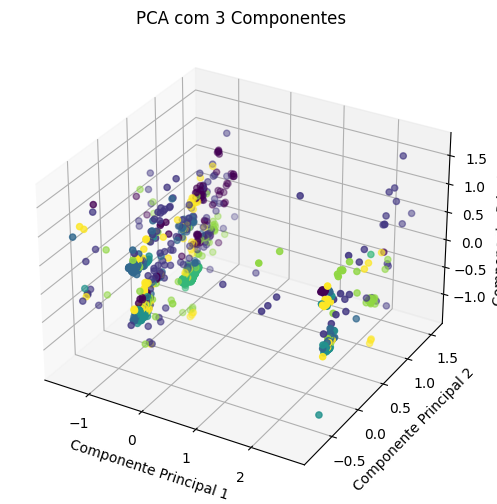

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('PCA com 3 Componentes')
plt.show()


In [ ]:
!pip install imblearn


In [ ]:
# Importar bibliotecas necessárias
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Separar as variáveis preditivas (X) e a variável-alvo (y)
X = data.drop(columns=['NObeyesdad'])  # Variáveis preditivas
y = data['NObeyesdad']                 # Variável-alvo

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir os dados balanceados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Inicializar os classificadores
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Avaliar cada classificador
for name, clf in classifiers.items():
    # Treinar o classificador
    clf.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = clf.predict(X_test)

    # Avaliar o desempenho
    print(f"Classificador: {name}")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Saving dataset_balanceado.csv to dataset_balanceado (1).csv
Classificador: Random Forest
Acurácia: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       1.00      0.95      0.98        65
           6       0.98      0.98      0.98        64

    accuracy                           0.98       454
   macro avg       0.99      0.99      0.98       454
weighted avg       0.99      0.98      0.98       454

--------------------------------------------------
Classificador: SVM
Acurácia: 0.7467
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        73
           1       0.61      0.48      0.54        64
           2       0.68      0.62      0.65    

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:52:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classificador: XGBoost
Acurácia: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.95      0.97      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       0.97      0.97      0.97        65
           6       0.97      1.00      0.98        64

    accuracy                           0.98       454
   macro avg       0.98      0.99      0.98       454
weighted avg       0.98      0.98      0.98       454

--------------------------------------------------


##  Ajuste de Hiperparâmetros (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar o modelo com os melhores hiperparâmetros
grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Validação Cruzada (Cross-Validation)

validação cruzada para garantir que o modelo não esteja superestimando seu desempenho devido à divisão treino/teste.

In [ ]:
from sklearn.model_selection import cross_val_score

# Avaliar o Random Forest com validação cruzada
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_resampled, y_resampled, cv=5)
print(f"Acurácia média com validação cruzada: {cv_scores.mean():.4f}")


Acurácia média com validação cruzada: 0.9744


## Análise de Feature Importance

ara entender melhor quais variáveis mais influenciam as predições dos modelos, foi realizado uma análise de importância das features. Isso é particularmente útil no Random Forest e XGBoost.

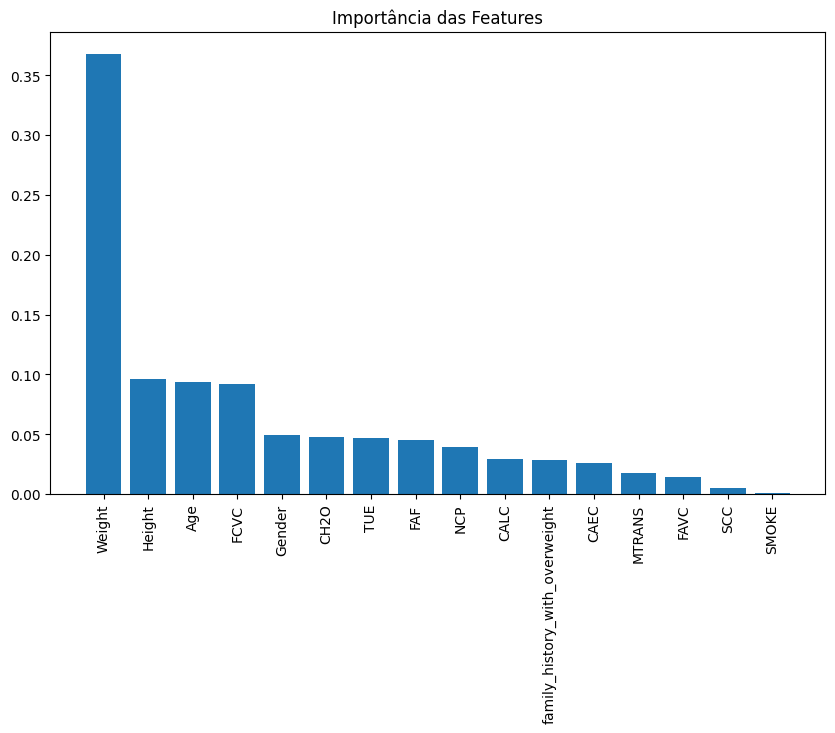

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Importância das features
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotar as 10 principais features
plt.figure(figsize=(10,6))
plt.title("Importância das Features")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


# Treinamento Final do Modelo com Hiperparâmetros Otimizados

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Para salvar o modelo treinado

# Treinar o modelo Random Forest com os melhores hiperparâmetros
final_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Treinar o modelo com os dados balanceados
final_rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = final_rf_model.predict(X_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia Final do Modelo: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Salvar o modelo treinado
joblib.dump(final_rf_model, 'random_forest_model_otimizado.pkl')


Acurácia Final do Modelo: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       1.00      0.95      0.98        65
           6       0.98      0.98      0.98        64

    accuracy                           0.98       454
   macro avg       0.99      0.99      0.98       454
weighted avg       0.99      0.98      0.98       454



['random_forest_model_otimizado.pkl']

In [ ]:
# Salvar o dataset balanceado como CSV
data_resampled.to_csv('dataset_balanceado_final.csv', index=False)

# Fazer o download do arquivo CSV no Colab
files.download('dataset_balanceado_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Fazer o download do modelo treinado
files.download('random_forest_model_otimizado.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Implementação em Produção (Simulação)

Agora que o modelo está otimizado e salvo, podemos simular a implementação em produção, onde ele pode ser usado para fazer previsões em novos dados.

## Carregar o Modelo Treinado para Fazer Novas Previsões:

In [ ]:
# Simular um novo conjunto de dados (exemplo fictício) com nomes das features
novos_dados = pd.DataFrame([[0.7, 0.5, 0.8, 1, 2, 0.5, 2, 1, 0.5, 0, 1, 3, 1, 1, 1, 0]],
                            columns=X.columns)

# Fazer previsões com o modelo carregado
novas_predicoes = rf_loaded_model.predict(novos_dados)
print("Nova previsão de obesidade:", novas_predicoes)


Nova previsão de obesidade: [3]


# Agrupamento

Saving dataset_tratado.csv to dataset_tratado.csv


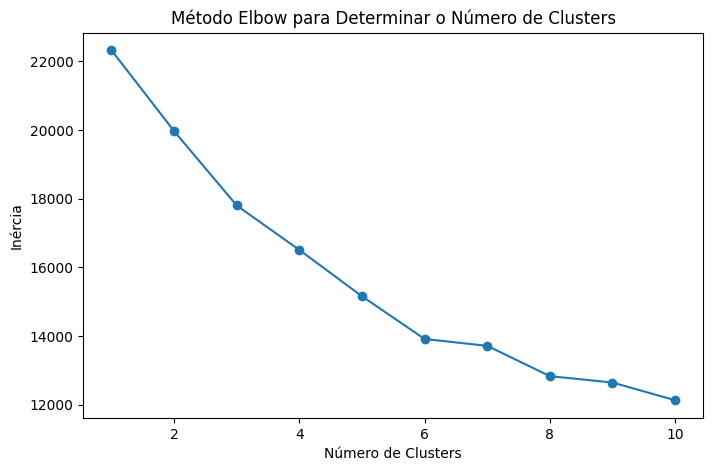

           Gender       Age    Height    Weight  \
Cluster                                           
0        0.984816  0.417963  0.605995  0.427529   
1        0.000000  0.442849  0.445754  0.582608   
2        0.269481  0.308687  0.384400  0.171522   
3        0.822222  0.701175  0.559630  0.401487   
4        0.758621  0.612081  0.610612  0.457308   
5        0.250000  0.325424  0.369649  0.172523   

         family_history_with_overweight      FAVC      FCVC       NCP  \
Cluster                                                                 
0                              0.984816  0.943601  0.597827  0.560529   
1                              1.000000  1.000000  0.973066  0.617000   
2                              0.522727  0.740260  0.651432  0.620221   
3                              0.927778  0.911111  0.665558  0.588164   
4                              0.862069  0.827586  0.736949  0.618068   
5                              0.390625  0.515625  0.831457  0.558180   

      

In [ ]:
# Importar bibliotecas necessárias
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fazer o upload do arquivo CSV
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
# Aqui você pode escolher o arquivo que deseja: tratado ou balanceado
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar as variáveis numéricas para o agrupamento
X = data.drop(columns=['NObeyesdad'])  # Remover a variável-alvo (se presente)

# Padronizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método Elbow
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico para encontrar o "cotovelo"
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Aplicar K-Means com o número de clusters desejado
optimal_k = 6  # Exemplo: escolha o valor de k baseado no gráfico do cotovelo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analisar os clusters formados
print(data.groupby('Cluster').mean())


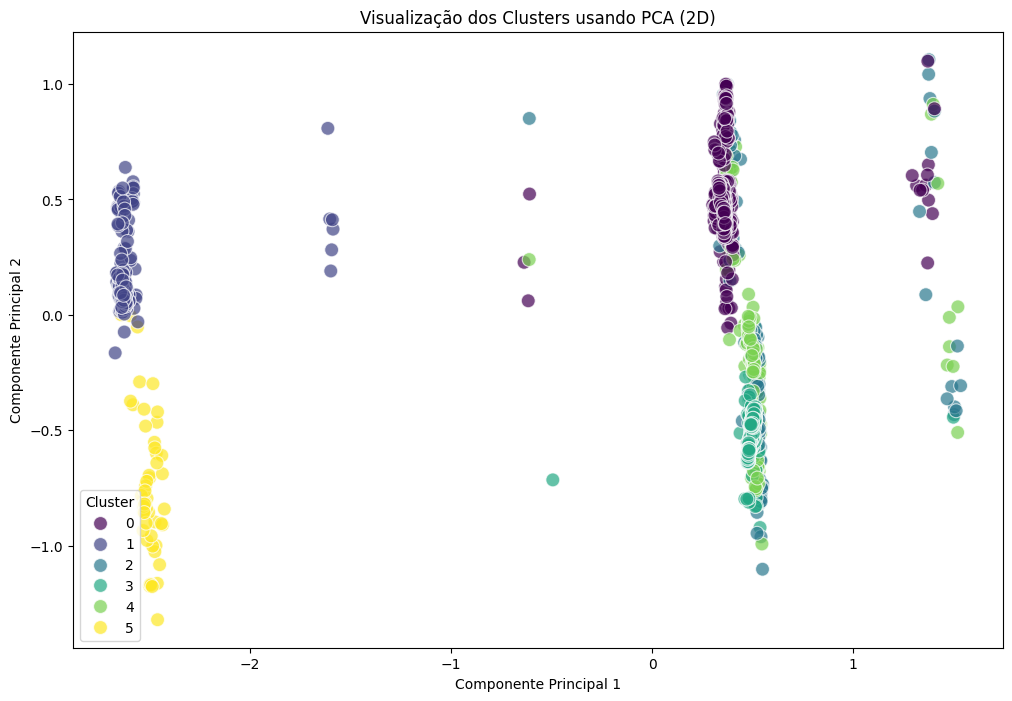

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregar o dataset tratado
dataset_name = list(uploaded.keys())[0]
data_resampled = pd.read_csv(dataset_name)

# Verificar se a coluna 'Cluster' não está presente e, se não, realizar o agrupamento
if 'Cluster' not in data_resampled.columns:
    # Definir o número de clusters com base no método Elbow (por exemplo, 4)
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o K-means ao dataset (sem a variável alvo 'NObeyesdad', se estiver presente)
    if 'NObeyesdad' in data_resampled.columns:
        features = data_resampled.drop(columns=['NObeyesdad'])
    else:
        features = data_resampled

    # Aplicar o K-means
    data_resampled['Cluster'] = kmeans.fit_predict(features)

# Utilizar PCA para reduzir a dimensionalidade dos dados para 2 componentes principais para visualização
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)

# Criar um DataFrame com as componentes principais e os clusters
pca_df = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
pca_df['Cluster'] = data_resampled['Cluster']

# Visualizar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Visualização dos Clusters usando PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


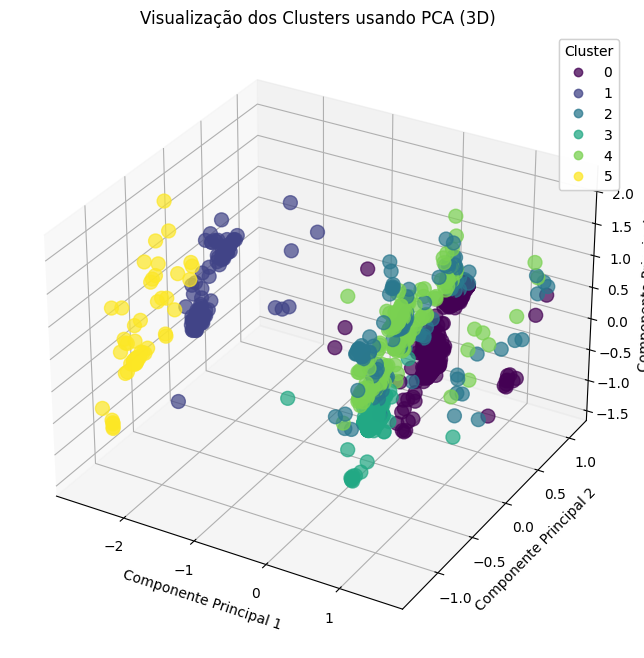

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Necessário para a visualização 3D

# Carregar o dataset tratado
dataset_name = list(uploaded.keys())[0]
data_resampled = pd.read_csv(dataset_name)

# Verificar se a coluna 'Cluster' não está presente e, se não, realizar o agrupamento
if 'Cluster' not in data_resampled.columns:
    # Definir o número de clusters com base no método Elbow (por exemplo, 6)
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o K-means ao dataset (sem a variável alvo 'NObeyesdad', se estiver presente)
    if 'NObeyesdad' in data_resampled.columns:
        features = data_resampled.drop(columns=['NObeyesdad'])
    else:
        features = data_resampled

    # Aplicar o K-means
    data_resampled['Cluster'] = kmeans.fit_predict(features)

# Utilizar PCA para reduzir a dimensionalidade dos dados para 3 componentes principais para visualização 3D
pca = PCA(n_components=3)
data_pca = pca.fit_transform(features)

# Criar um DataFrame com as componentes principais e os clusters
pca_df = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])
pca_df['Cluster'] = data_resampled['Cluster']

# Visualizar os clusters em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os clusters em 3D
scatter = ax.scatter(pca_df['Componente 1'], pca_df['Componente 2'], pca_df['Componente 3'],
                     c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar rótulos e título
ax.set_title('Visualização dos Clusters usando PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Adicionar legenda
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

# Mostrar o gráfico
plt.show()


# Comparação com outros algortimos

In [ ]:
!pip install scikeras[tensorflow]


In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
from google.colab import files
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# Carregar o dataset
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar variáveis preditoras e alvo
X = data.drop(columns=['NObeyesdad']) if 'NObeyesdad' in data.columns else data.iloc[:, :-1]  # Assumindo a última coluna como alvo, caso não tenha o nome 'NObeyesdad'
y = data['NObeyesdad'] if 'NObeyesdad' in data.columns else data.iloc[:, -1]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pasta para salvar os modelos
os.makedirs("modelos_treinados", exist_ok=True)

# Função para criar uma rede neural simples para classificação
def create_neural_network():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(y.unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Lista de modelos a serem avaliados
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "MLP (Rede Neural Clássica)": MLPClassifier(max_iter=300, random_state=42),
    "Keras Neural Network": KerasClassifier(model=create_neural_network, epochs=50, batch_size=10, verbose=0),
}

# Modelos ensemble complexos
stacking = StackingClassifier(
    estimators=[('rf', RandomForestClassifier(random_state=42)),
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('svc', SVC(probability=True, random_state=42))],
    final_estimator=LogisticRegression()
)

voting = VotingClassifier(
    estimators=[('rf', RandomForestClassifier(random_state=42)),
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('knn', KNeighborsClassifier())],
    voting='soft'
)

modelos["Stacking"] = stacking
modelos["Voting"] = voting

# Dicionário para armazenar as métricas
metricas = {}

# Treinamento, avaliação e salvamento dos modelos
for nome, modelo in modelos.items():
    print(f"Treinando o modelo: {nome}")

    # Treinamento
    if nome == "Keras Neural Network":
        modelo.fit(X_train, y_train)
    else:
        modelo.fit(X_train, y_train)

    # Previsões e métricas
    y_pred = modelo.predict(X_test)
    if nome == "Keras Neural Network" and y_pred.ndim == 2:
        y_pred = np.argmax(y_pred, axis=1)  # Para redes neurais em Keras, precisa converter para classes

    # Calculando as métricas
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precisao = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Salvando as métricas
    metricas[nome] = {
        "Acurácia": acuracia,
        "F1 Score": f1,
        "Precisão": precisao,
        "Recall": recall
    }

    # Salvando o modelo
    caminho_modelo = f"modelos_treinados/{nome}.pkl"
    if nome != "Keras Neural Network":
        joblib.dump(modelo, caminho_modelo)
    else:
        modelo.model_.save(caminho_modelo.replace(".pkl", ".h5"))  # Para redes neurais Keras, salva como .h5
    print(f"Modelo {nome} salvo em {caminho_modelo}")

# Criar DataFrame com as métricas para facilitar a visualização
metricas_df = pd.DataFrame(metricas).T
print("\nMétricas de avaliação dos modelos:")
print(metricas_df)

# Exportar o DataFrame de métricas para download
metricas_df.to_csv("modelos_treinados/metricas_modelos.csv")

# Realizar o download dos modelos salvos (Google Colab)
files.download("modelos_treinados/metricas_modelos.csv")

for model_name in modelos:
    model_path = f"modelos_treinados/{model_name}.pkl"
    if model_name == "Keras Neural Network":
        model_path = model_path.replace(".pkl", ".h5")
    files.download(model_path)


Saving dataset_balanceado_final.csv to dataset_balanceado_final (1).csv
Treinando o modelo: Logistic Regression
Modelo Logistic Regression salvo em modelos_treinados/Logistic Regression.pkl
Treinando o modelo: Decision Tree
Modelo Decision Tree salvo em modelos_treinados/Decision Tree.pkl
Treinando o modelo: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo Random Forest salvo em modelos_treinados/Random Forest.pkl
Treinando o modelo: Gradient Boosting
Modelo Gradient Boosting salvo em modelos_treinados/Gradient Boosting.pkl
Treinando o modelo: AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelo AdaBoost salvo em modelos_treinados/AdaBoost.pkl
Treinando o modelo: Bagging
Modelo Bagging salvo em modelos_treinados/Bagging.pkl
Treinando o modelo: K-Nearest Neighbors
Modelo K-Nearest Neighbors salvo em modelos_treinados/K-Nearest Neighbors.pkl
Treinando o modelo: SVM
Modelo SVM salvo em modelos_treinados/SVM.pkl
Treinando o modelo: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo XGBoost salvo em modelos_treinados/XGBoost.pkl
Treinando o modelo: MLP (Rede Neural Clássica)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelo MLP (Rede Neural Clássica) salvo em modelos_treinados/MLP (Rede Neural Clássica).pkl
Treinando o modelo: Keras Neural Network


Modelo Keras Neural Network salvo em modelos_treinados/Keras Neural Network.pkl
Treinando o modelo: Stacking
Modelo Stacking salvo em modelos_treinados/Stacking.pkl
Treinando o modelo: Voting
Modelo Voting salvo em modelos_treinados/Voting.pkl

Métricas de avaliação dos modelos:
                            Acurácia  F1 Score  Precisão    Recall
Logistic Regression         0.722467  0.709163  0.707158  0.722467
Decision Tree               0.942731  0.942511  0.942694  0.942731
Random Forest               0.972100  0.972413  0.974552  0.972100
Gradient Boosting           0.972100  0.972220  0.972632  0.972100
AdaBoost                    0.302496  0.181537  0.130590  0.302496
Bagging                     0.966226  0.966026  0.966224  0.966226
K-Nearest Neighbors         0.838473  0.835362  0.836316  0.838473
SVM                         0.740088  0.729393  0.729702  0.740088
XGBoost                     0.977974  0.978027  0.978264  0.977974
MLP (Rede Neural Clássica)  0.925110  0.924761  0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf

# Função para converter entrada categórica para numérica conforme o mapeamento dos dados de treinamento
def preprocess_input(data):
    mapping = {
        'Gender': {'Male': 1, 'Female': 0},
        'family_history_with_overweight': {'yes': 1, 'no': 0},
        'FAVC': {'yes': 1, 'no': 0},
        'SMOKE': {'yes': 1, 'no': 0},
        'SCC': {'yes': 1, 'no': 0},
        'CAEC': {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0},
        'CALC': {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0},
        'MTRANS': {'Public_Transportation': 2, 'Automobile': 0, 'Walking': 4, 'Motorbike': 3, 'Bike': 1}
    }
    for col, map_dict in mapping.items():
        data[col] = data[col].map(map_dict)
    return data

# Dados dos pacientes (exemplo variado)
patients = [
    {'Gender': 'Male', 'Age': 25, 'Height': 1.80, 'Weight': 85, 'family_history_with_overweight': 'yes', 'FAVC': 'no',
     'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 2, 'TUE': 1, 'CALC': 'Sometimes', 'MTRANS': 'Public_Transportation'},

    {'Gender': 'Female', 'Age': 30, 'Height': 1.65, 'Weight': 70, 'family_history_with_overweight': 'no', 'FAVC': 'yes',
     'FCVC': 3, 'NCP': 2, 'CAEC': 'Always', 'SMOKE': 'yes', 'CH2O': 3, 'SCC': 'yes', 'FAF': 1, 'TUE': 2, 'CALC': 'Frequently', 'MTRANS': 'Automobile'},

    {'Gender': 'Male', 'Age': 22, 'Height': 1.72, 'Weight': 78, 'family_history_with_overweight': 'yes', 'FAVC': 'no',
     'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 3, 'TUE': 0, 'CALC': 'Sometimes', 'MTRANS': 'Walking'}
]

# Converte os dados dos pacientes
patients_df = pd.DataFrame(patients)
patients_df = preprocess_input(patients_df)

# Carregar os modelos
modelos = {
    "Stacking": joblib.load("modelos_treinados/Stacking.pkl"),
    "Bagging": joblib.load("modelos_treinados/Bagging.pkl"),
    "XGBoost": joblib.load("modelos_treinados/XGBoost.pkl"),
    "Random Forest": joblib.load("modelos_treinados/Random Forest.pkl"),
    "Gradient Boosting": joblib.load("modelos_treinados/Gradient Boosting.pkl"),
    "Keras Neural Network": tf.keras.models.load_model("modelos_treinados/Keras Neural Network.h5")
}

# Dicionário para armazenar os resultados
results = {}

# Previsão e análise para cada paciente
for i, patient in enumerate(patients_df.values):
    print(f"\nPaciente {i+1} - Características: {patients[i]}")
    patient = patient.reshape(1, -1)  # Transformar para formato adequado ao modelo
    results[i+1] = {}

    for model_name, model in modelos.items():
        # Previsão com o modelo
        if model_name == "Keras Neural Network":
            prediction = np.argmax(model.predict(patient), axis=1)
        else:
            prediction = model.predict(patient)

        # Converter a previsão numérica para o nível de obesidade correspondente
        obesity_level = {0: 'Normal Weight', 1: 'Overweight Level I', 2: 'Overweight Level II',
                         3: 'Obesity Type I', 4: 'Obesity Type II', 5: 'Obesity Type III'}
        predicted_level = obesity_level[prediction[0]]

        # Exibir o resultado
        print(f"{model_name} previu: {predicted_level}")

        # Guardar resultado
        results[i+1][model_name] = predicted_level

# Exibir a tabela final de resultados
resultados_df = pd.DataFrame(results).T
print("\nResultados de Classificação por Paciente:")
print(resultados_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid


Paciente 1 - Características: {'Gender': 'Male', 'Age': 25, 'Height': 1.8, 'Weight': 85, 'family_history_with_overweight': 'yes', 'FAVC': 'no', 'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 2, 'TUE': 1, 'CALC': 'Sometimes', 'MTRANS': 'Public_Transportation'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type I
XGBoost previu: Obesity Type I
Random Forest previu: Overweight Level II
Gradient Boosting previu: Obesity Type II


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid

Keras Neural Network previu: Obesity Type II

Paciente 2 - Características: {'Gender': 'Female', 'Age': 30, 'Height': 1.65, 'Weight': 70, 'family_history_with_overweight': 'no', 'FAVC': 'yes', 'FCVC': 3, 'NCP': 2, 'CAEC': 'Always', 'SMOKE': 'yes', 'CH2O': 3, 'SCC': 'yes', 'FAF': 1, 'TUE': 2, 'CALC': 'Frequently', 'MTRANS': 'Automobile'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type II
XGBoost previu: Obesity Type II
Random Forest previu: Obesity Type II
Gradient Boosting previu: Obesity Type II
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Keras Neural Network previu: Obesity Type I

Paciente 3 - Características: {'Gender': 'Male', 'Age': 22, 'Height': 1.72, 'Weight': 78, 'family_history_with_overweight': 'yes', 'FAVC': 'no', 'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 3, 'TUE': 0, 'CALC': 'Sometimes', 'MTRANS': 'Walking'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type I
XGBoost previu: Obesity Type I
Random Forest prev

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Gradient Boosting previu: Obesity Type II
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Keras Neural Network previu: Obesity Type II

Resultados de Classificação por Paciente:
          Stacking          Bagging          XGBoost        Random Forest  \
1  Obesity Type II   Obesity Type I   Obesity Type I  Overweight Level II   
2  Obesity Type II  Obesity Type II  Obesity Type II      Obesity Type II   
3  Obesity Type II   Obesity Type I   Obesity Type I       Obesity Type I   

  Gradient Boosting Keras Neural Network  
1   Obesity Type II      Obesity Type II  
2   Obesity Type II       Obesity Type I  
3   Obesity Type II      Obesity Type II  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# API

In [ ]:
!pip install fastapi uvicorn pyngrok
!pip install tensorflow joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Substitua "YOUR_NGROK_AUTH_TOKEN" pelo seu token
ngrok.set_auth_token("2gzWjRUV9XWOPpfqqs6ZZNSeDxF_5t9rhNUBAGHZBh7suKmAQ")


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from collections import Counter

app = FastAPI()

# Carregar os modelos usando caminhos relativos
modelos = {
    "Stacking": joblib.load("./modelos_treinados/Stacking.pkl"),
    "Bagging": joblib.load("./modelos_treinados/Bagging.pkl"),
    "XGBoost": joblib.load("./modelos_treinados/XGBoost.pkl"),
    "RandomForest": joblib.load("./modelos_treinados/Random Forest.pkl"),
    "GradientBoosting": joblib.load("./modelos_treinados/Gradient Boosting.pkl"),
    "KerasNeuralNetwork": load_model("./modelos_treinados/Keras Neural Network.h5")
}

class PatientData(BaseModel):
    Gender: int
    Age: float
    Height: float
    Weight: float
    family_history_with_overweight: int
    FAVC: int
    FCVC: float
    NCP: float
    CAEC: int
    SMOKE: int
    CH2O: float
    SCC: int
    FAF: float
    TUE: float
    CALC: int
    MTRANS: int

def predict_majority(data):
    predictions = []
    data = np.array(data).reshape(1, -1)

    for nome, modelo in modelos.items():
        if nome == "KerasNeuralNetwork":
            pred = np.argmax(modelo.predict(data), axis=1)[0]
        else:
            pred = modelo.predict(data)[0]
        predictions.append(pred)

    major_vote = Counter(predictions).most_common(1)[0][0]
    return {
        "predictions": predictions,
        "majority_vote": major_vote
    }

@app.post("/predict/")
async def predict(data: PatientData):
    try:
        data_list = [
            data.Gender, data.Age, data.Height, data.Weight,
            data.family_history_with_overweight, data.FAVC, data.FCVC, data.NCP,
            data.CAEC, data.SMOKE, data.CH2O, data.SCC, data.FAF, data.TUE,
            data.CALC, data.MTRANS
        ]
        result = predict_majority(data_list)
        return {"classifications": result["predictions"], "majority_class": result["majority_vote"]}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [ ]:
!pip install uvicorn


In [ ]:
from threading import Thread
import uvicorn

def run_api():
    uvicorn.run("api:app", host="0.0.0.0", port=8000)

api_thread = Thread(target=run_api)
api_thread.start()


Exception in thread Thread-21 (run_api):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-43-5fda430a67a9>", line 5, in run_api
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 649, in run_until_complete
    return future.result()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 69, in serve
    await self._serve(sockets)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 76, in _serve
    config

In [ ]:
# Reiniciar a sessão para começar do zero se necessário
from pyngrok import ngrok
from threading import Thread
import uvicorn

# Função para iniciar o servidor FastAPI com Uvicorn
def run_api():
    uvicorn.run("api:app", host="0.0.0.0", port=8000)

# Iniciar o servidor FastAPI em uma nova thread
api_thread = Thread(target=run_api)
api_thread.start()

# Conectar o ngrok à porta do servidor FastAPI (8000)
public_url = ngrok.connect(8000)
print("A API está disponível publicamente em:", public_url)



In [ ]:
# api.py
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def root():
    return {"message": "API está funcionando"}


In [ ]:
!uvicorn api:app --host 0.0.0.0 --port 8000 --reload &


In [ ]:
from pyngrok import ngrok

# Matar qualquer túnel existente
ngrok.kill()

# Conectar o Ngrok à porta 8000
public_url = ngrok.connect(8000)
print("A API está disponível publicamente em:", public_url)

# Comparar com varios modelos

In [1]:
from google.colab import files

Saving dataset_tratado.csv to dataset_tratado.csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWa

Erro ao treinar RadiusNeighborsClassifier: No neighbors found for test samples array([  8,  20,  29,  37,  38,  46,  48,  55,  66,  74,  83,  92,  97,
       103, 109, 117, 118, 119, 133, 165, 201, 223, 246, 249, 250, 263,
       269, 270, 276, 308, 321, 325, 329, 336, 341, 342, 345, 365, 378,
       383, 394, 403, 404, 414]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-2-4a0165ca0b52>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acurácia', y='Modelo', d

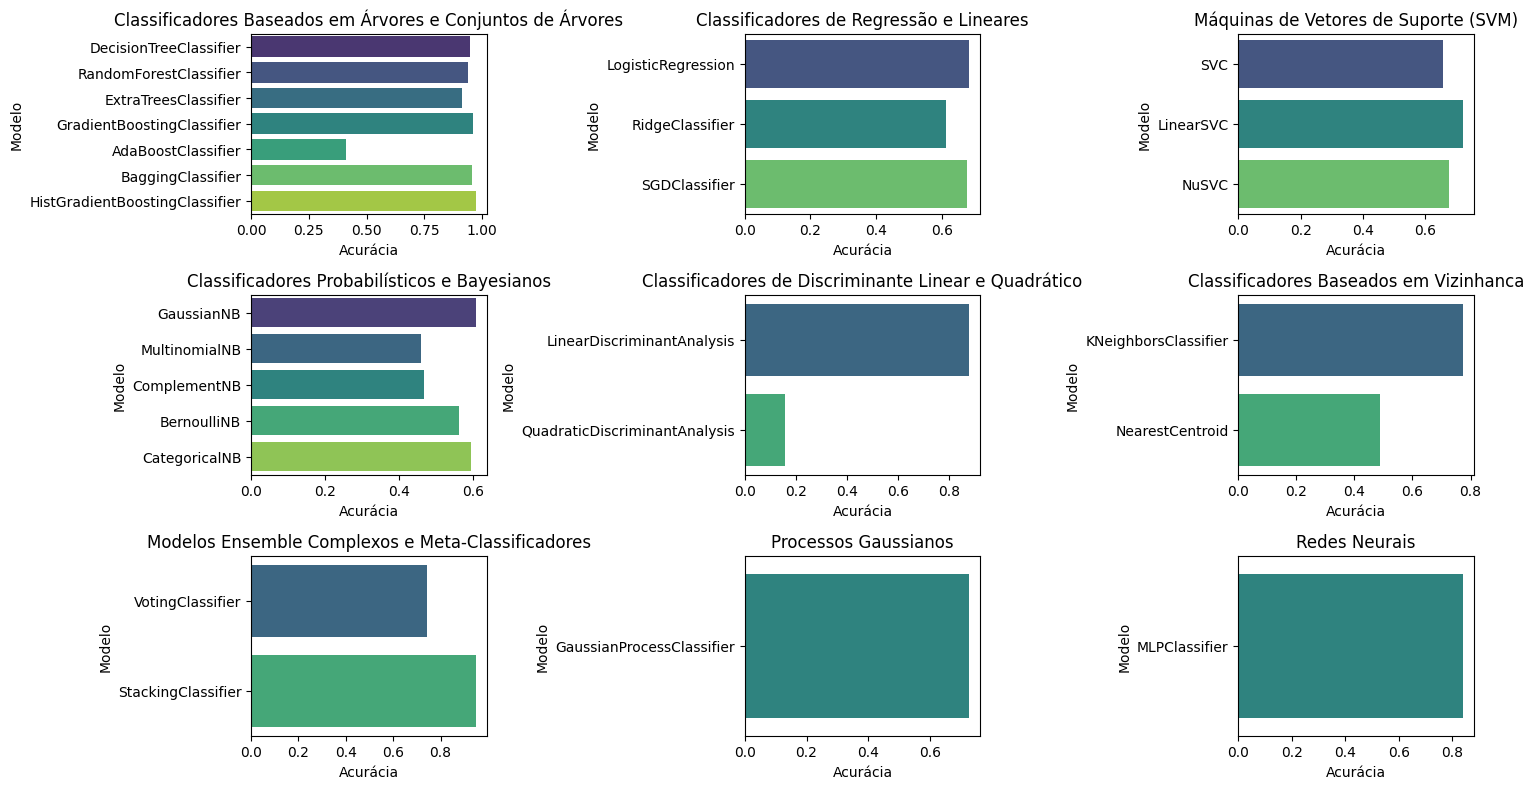


Métricas de Avaliação dos Modelos:
                                            Categoria  \
0   Classificadores Baseados em Árvores e Conjunto...   
1   Classificadores Baseados em Árvores e Conjunto...   
2   Classificadores Baseados em Árvores e Conjunto...   
3   Classificadores Baseados em Árvores e Conjunto...   
4   Classificadores Baseados em Árvores e Conjunto...   
5   Classificadores Baseados em Árvores e Conjunto...   
6   Classificadores Baseados em Árvores e Conjunto...   
7             Classificadores de Regressão e Lineares   
8             Classificadores de Regressão e Lineares   
9             Classificadores de Regressão e Lineares   
10               Máquinas de Vetores de Suporte (SVM)   
11               Máquinas de Vetores de Suporte (SVM)   
12               Máquinas de Vetores de Suporte (SVM)   
13       Classificadores Probabilísticos e Bayesianos   
14       Classificadores Probabilísticos e Bayesianos   
15       Classificadores Probabilísticos e Bayesiano

In [2]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Carregar o dataset
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar as variáveis preditoras e a variável alvo
X = data.drop(columns=['NObeyesdad']) if 'NObeyesdad' in data.columns else data.iloc[:, :-1]  # 'NObeyesdad' como alvo
y = data['NObeyesdad'] if 'NObeyesdad' in data.columns else data.iloc[:, -1]  # assumindo que o alvo é a última coluna

# Codificar a variável alvo se for categórica
y = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir os classificadores em categorias
classificadores = {
    'Classificadores Baseados em Árvores e Conjuntos de Árvores': [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        HistGradientBoostingClassifier()
    ],
    'Classificadores de Regressão e Lineares': [
        LogisticRegression(max_iter=200),
        RidgeClassifier(),
        SGDClassifier()
    ],
    'Máquinas de Vetores de Suporte (SVM)': [
        SVC(),
        LinearSVC(),
        NuSVC()
    ],
    'Classificadores Probabilísticos e Bayesianos': [
        GaussianNB(),
        MultinomialNB(),
        ComplementNB(),
        BernoulliNB(),
        CategoricalNB()
    ],
    'Classificadores de Discriminante Linear e Quadrático': [
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()
    ],
    'Classificadores Baseados em Vizinhanca': [
        KNeighborsClassifier(),
        RadiusNeighborsClassifier(),
        NearestCentroid()
    ],
    'Modelos Ensemble Complexos e Meta-Classificadores': [
        VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard'),
        StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], final_estimator=LogisticRegression())
    ],
    'Processos Gaussianos': [
        GaussianProcessClassifier()
    ],
    'Redes Neurais': [
        MLPClassifier(max_iter=300)
    ]
}

# Função para treinar, avaliar e coletar resultados
resultados = []
for categoria, modelos in classificadores.items():
    for modelo in modelos:
        try:
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            resultados.append({
                'Categoria': categoria,
                'Modelo': modelo.__class__.__name__,
                'Acurácia': acc,
                'F1 Score': f1
            })
        except Exception as e:
            print(f"Erro ao treinar {modelo.__class__.__name__}: {e}")

# Converter os resultados para DataFrame
resultados_df = pd.DataFrame(resultados)

# Plotar os gráficos para cada categoria
categorias = resultados_df['Categoria'].unique()
plt.figure(figsize=(15, 8))
for i, categoria in enumerate(categorias, 1):
    plt.subplot(3, 3, i)
    subset = resultados_df[resultados_df['Categoria'] == categoria]
    sns.barplot(x='Acurácia', y='Modelo', data=subset, palette='viridis')
    plt.title(f'{categoria}')
    plt.xlabel('Acurácia')
plt.tight_layout()
plt.show()

# Exibir os resultados finais
print("\nMétricas de Avaliação dos Modelos:")
print(resultados_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWa

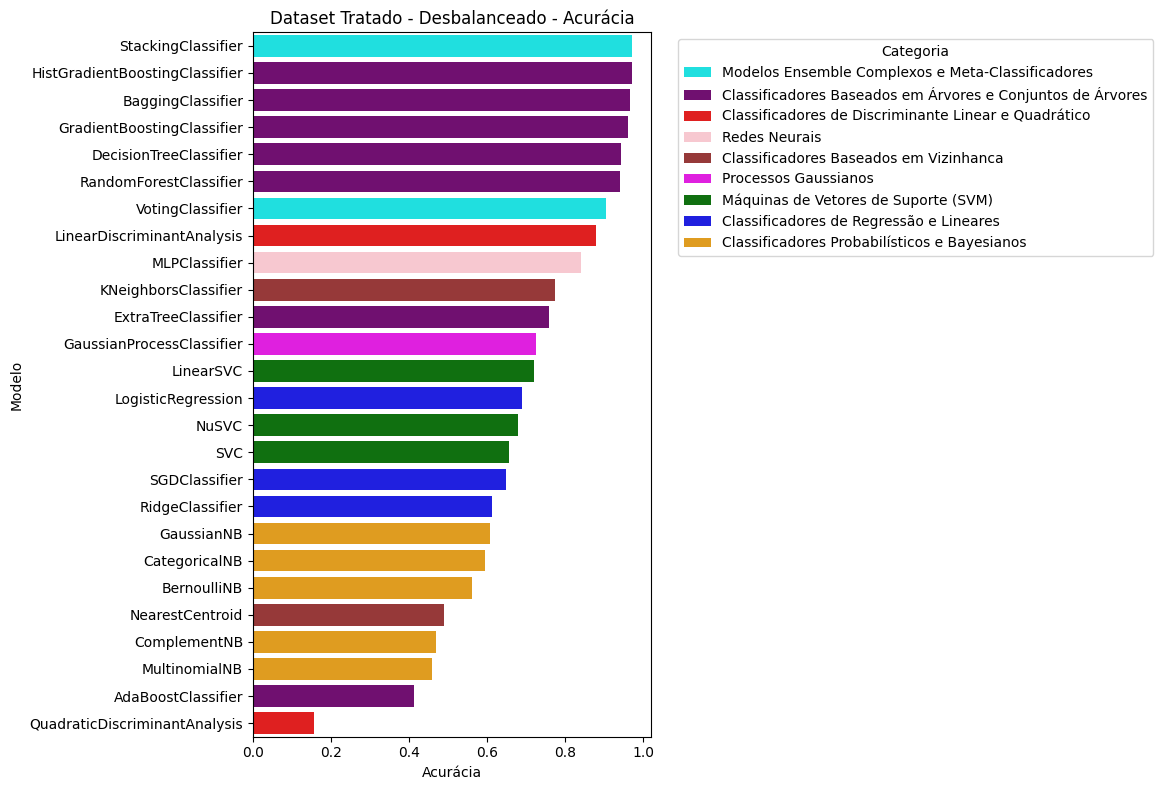

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Carregar o dataset
data = pd.read_csv('dataset_tratado.csv')
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionário de classificadores organizados por categoria
classificadores = {
    "Classificadores Baseados em Árvores e Conjuntos de Árvores": {
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "ExtraTreeClassifier": ExtraTreeClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "HistGradientBoostingClassifier": HistGradientBoostingClassifier()

    },
    "Classificadores de Regressão e Lineares": {
        "LogisticRegression": LogisticRegression(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
    },
    "Máquinas de Vetores de Suporte (SVM)": {
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "NuSVC": NuSVC(),
    },
    "Classificadores Probabilísticos e Bayesianos": {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "ComplementNB": ComplementNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB(),
    },
    "Classificadores de Discriminante Linear e Quadrático": {
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
        "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    },
    "Classificadores Baseados em Vizinhanca": {
        "KNeighborsClassifier": KNeighborsClassifier(),
        "NearestCentroid": NearestCentroid(),
    },
    "Modelos Ensemble Complexos e Meta-Classificadores": {
        "VotingClassifier": VotingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC(probability=True))
        ], voting='soft'),
        "StackingClassifier": StackingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('svc', SVC(probability=True))
        ]),
    },
    "Processos Gaussianos": {
        "GaussianProcessClassifier": GaussianProcessClassifier(),
    },
    "Redes Neurais": {
        "MLPClassifier": MLPClassifier(max_iter=300),
    },
}

# Resultados de desempenho
resultados = []

# Avaliar cada classificador com hiperparâmetros básicos e ajustados
for categoria, modelos in classificadores.items():
    for nome, modelo in modelos.items():
        try:
            # Treinar e avaliar o modelo
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acuracia = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            resultados.append({"Categoria": categoria, "Modelo": nome, "Acurácia": acuracia, "F1 Score": f1})
        except Exception as e:
            print(f"Erro ao treinar {nome}: {e}")

# Converter resultados em DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenar os classificadores por Acurácia
resultados_df = resultados_df.sort_values(by='Acurácia', ascending=False)

# Definir cores para cada categoria
cores_categorias = {
    "Classificadores Baseados em Árvores e Conjuntos de Árvores": "purple",
    "Classificadores de Regressão e Lineares": "blue",
    "Máquinas de Vetores de Suporte (SVM)": "green",
    "Classificadores Probabilísticos e Bayesianos": "orange",
    "Classificadores de Discriminante Linear e Quadrático": "red",
    "Classificadores Baseados em Vizinhanca": "brown",
    "Modelos Ensemble Complexos e Meta-Classificadores": "cyan",
    "Processos Gaussianos": "magenta",
    "Redes Neurais": "pink",
}

# Adicionar uma coluna de cores ao DataFrame
resultados_df['Cor'] = resultados_df['Categoria'].map(cores_categorias)

# Plotar o gráfico consolidado
plt.figure(figsize=(12, 8))
sns.barplot(data=resultados_df, x="Acurácia", y="Modelo", hue="Categoria", dodge=False, palette=cores_categorias)
plt.title('Dataset Tratado - Desbalanceado - Acurácia')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Análise de Desempenho dos Classificadores no Dataset Desbalanceado

O gráfico acima apresenta o desempenho de diversos classificadores aplicados a um dataset desbalanceado. A métrica utilizada para a avaliação foi a **Acurácia**, e os classificadores foram organizados por categoria para melhor compreensão.

### 1. Modelos Ensemble Complexos e Meta-Classificadores
   - **StackingClassifier** e **VotingClassifier** mostraram alto desempenho, com **StackingClassifier** alcançando a maior acurácia geral.
   - Esses modelos combinam a força de múltiplos classificadores, melhorando a precisão em relação aos classificadores individuais. Eles são ideais para cenários onde se deseja robustez e precisão, mas podem ser computacionalmente mais caros.

### 2. Classificadores Baseados em Árvores e Conjuntos de Árvores
   - **HistGradientBoostingClassifier**, **BaggingClassifier**, **GradientBoostingClassifier**, **DecisionTreeClassifier** e **RandomForestClassifier** obtiveram acurácias elevadas, destacando-se entre os melhores.
   - Esses modelos são altamente eficazes em lidar com dados complexos e desbalanceados, já que aproveitam a combinação de várias árvores de decisão. Os classificadores baseados em árvores são populares por sua interpretabilidade e pela boa capacidade de generalização em dados complexos.

### 3. Classificadores de Discriminante Linear e Quadrático
   - **LinearDiscriminantAnalysis** obteve um desempenho razoável, destacando-se nesta categoria.
   - **QuadraticDiscriminantAnalysis**, por outro lado, apresentou um desempenho muito baixo, indicando que este método pode não ser adequado para este conjunto de dados. Este modelo é mais sensível a suposições de distribuição dos dados, o que pode ter impactado negativamente.

### 4. Redes Neurais
   - **MLPClassifier** teve um desempenho satisfatório, demonstrando que uma rede neural clássica é capaz de capturar padrões relevantes, mesmo com um dataset desbalanceado.
   - Contudo, seu desempenho foi inferior aos melhores classificadores baseados em árvores e ensembles, sugerindo que redes mais profundas ou técnicas de balanceamento poderiam melhorar a performance.

### 5. Classificadores Baseados em Vizinhanca
   - **KNeighborsClassifier** apresentou uma acurácia moderada, sendo superior ao **NearestCentroid**.
   - Classificadores baseados em vizinhança são sensíveis a dados desbalanceados, já que exemplos minoritários podem ser "sobrepujados" pelos dados da maioria, o que pode justificar o desempenho mediano.

### 6. Processos Gaussianos
   - **GaussianProcessClassifier** obteve uma acurácia aceitável, embora inferior aos modelos de árvores e ensembles.
   - Este modelo é poderoso, mas pode ser computacionalmente caro, especialmente em datasets maiores. Pode ser mais adequado para dados bem distribuídos e com um número limitado de amostras.

### 7. Máquinas de Vetores de Suporte (SVM)
   - **LinearSVC**, **NuSVC** e **SVC** apresentaram acurácias moderadas, com **LinearSVC** sendo o melhor entre eles.
   - SVMs são modelos robustos e eficientes, mas podem enfrentar dificuldades com datasets altamente desbalanceados, já que se concentram em maximizar margens entre classes, o que pode não ser eficaz em situações de classes desbalanceadas.

### 8. Classificadores de Regressão e Lineares
   - **LogisticRegression** teve desempenho razoável, seguido por **SGDClassifier** e **RidgeClassifier** com acurácias inferiores.
   - Esses modelos lineares podem ser adequados para dados bem comportados e balanceados, mas são menos eficazes em dados complexos e desbalanceados, onde métodos não lineares tendem a se destacar.

### 9. Classificadores Probabilísticos e Bayesianos
   - **GaussianNB** teve o melhor desempenho entre os modelos Bayesianos, enquanto os demais (como **MultinomialNB**, **ComplementNB**, **BernoulliNB** e **CategoricalNB**) apresentaram acurácias baixas.
   - Classificadores Bayesianos são rápidos e interpretáveis, mas frequentemente enfrentam dificuldades em datasets com alta complexidade e desbalanceamento, como é o caso aqui.

## Conclusão

Os modelos ensemble, especialmente **StackingClassifier** e **HistGradientBoostingClassifier**, destacaram-se com as maiores acurácias. Classificadores baseados em árvores também apresentaram desempenhos elevados, sendo uma escolha robusta para datasets desbalanceados. Modelos lineares e Bayesianos tiveram acurácias mais baixas, indicando que são menos adequados para este conjunto de dados específico.


## Usando os 5 Melhores Classificadores

<Figure size 1200x800 with 0 Axes>

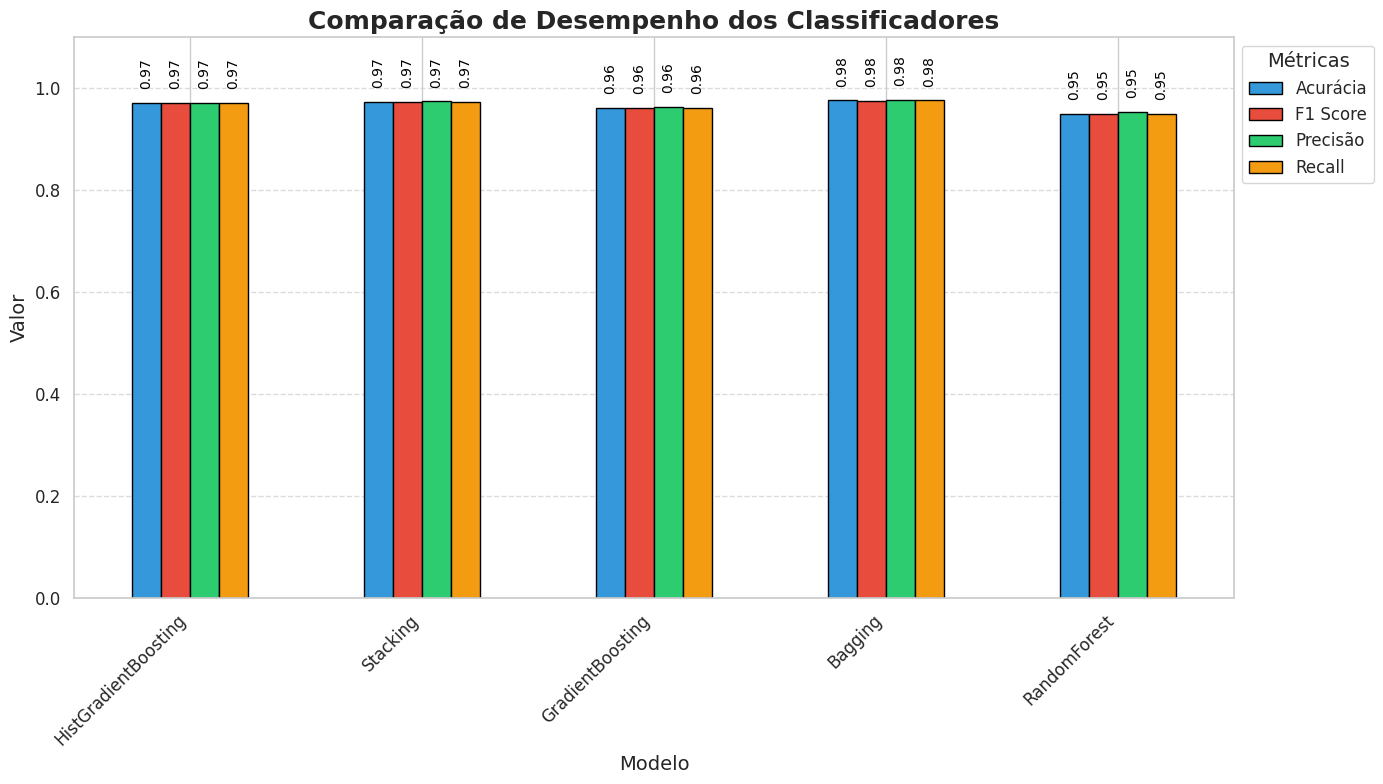

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Carregar o dataset
data = pd.read_csv('dataset_tratado.csv')
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicionário de classificadores a serem avaliados
classificadores = {
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier())
        ]
    ),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "RandomForest": RandomForestClassifier(),
}

# Resultados de desempenho
resultados = []

# Avaliar cada classificador
for nome, modelo in classificadores.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precisao = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    resultados.append({
        "Modelo": nome,
        "Acurácia": acuracia,
        "F1 Score": f1,
        "Precisão": precisao,
        "Recall": recall,
    })

# Converter resultados em DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df.set_index("Modelo")

# Configuração do estilo e tamanho
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Plotar o gráfico de barras
ax = resultados_df.plot(kind="bar", figsize=(14, 8), color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], edgecolor="black")
plt.title("Comparação de Desempenho dos Classificadores", fontsize=18, fontweight='bold')
plt.xlabel("Modelo", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.ylim(0, 1.1)

# Adicionar valores nas barras com mais espaçamento
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container], label_type="edge", padding=10, fontsize=10, color="black", rotation=90)

# Configuração da legenda
plt.legend(title="Métricas", title_fontsize=14, fontsize=12, loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()
